## Spiral Data Classification

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.3.0


## 데이터 생성

#### Spiral Data Generation 함수 정의

In [3]:
theta = 4

# generate the data
def generate_spiral_dataset(num_data, num_class, num_dim=2):
    input_data = np.zeros((num_data*num_class,num_dim)) # data matrix (each row = single example)
    output_data = np.zeros(num_data*num_class, dtype='uint8') # class labels

    for j in range(num_class):
      ix = range(num_data*j,num_data*(j+1))
      r = np.linspace(0.0,1,num_data) # radius [0,1]
      t = np.linspace(j*theta,(j+1)*theta,num_data) + np.random.randn(num_data)*0.2 # theta [0, 4]
      input_data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      output_data[ix] = j
    
    return input_data, output_data

#### 훈련 데이터, 테스트 데이터 생성

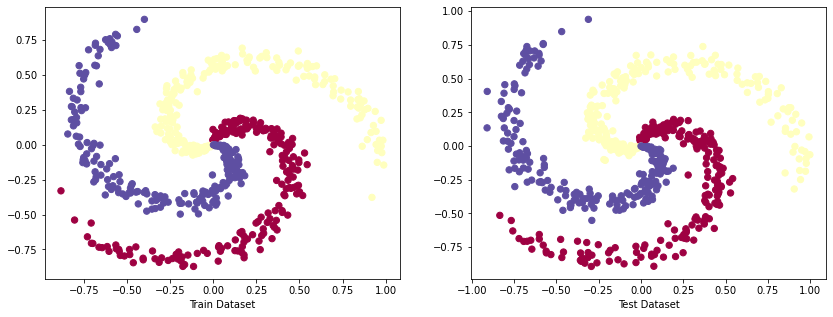

In [4]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

train_x, train_y = generate_spiral_dataset(N, K, D)
test_x, test_y = generate_spiral_dataset(N, K, D)

# lets visualize the data:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Train Dataset")
plt.subplot(1,2,2)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Test Dataset")
plt.show()

## 모델 정의
#### Q. `tf.keras.layers.Dense`함수를 이용해서 Fully Connected Layer를 구성해 보시오.

In [5]:
# Dense를 이용해서 3계층 : hidden 20, hidden 20, output K
model = keras.Sequential([
      keras.layers.Dense(20, activation='relu', input_shape=(D,)), #input layer는 D차원, 첫번째 hidden layer는 20개의 뉴런을 가지고 있다
      keras.layers.Dense(20, activation='relu'), # 두번째 layer는 20개의 뉴런으로 이루어져 있다
      keras.layers.Dense(K, activation="softmax") #output layer는 K개의 클래스로 이루어져 있다, classification문제이므로 output layer는 sotfmax사용
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련 설정
#### Q. 훈련에 필요한 Optimizer, Loss, Metrics 설정하시오.

In [6]:
# loss, optimizer, metric 설정 
# optimizer는 'adam'으로  metric은 ‘accuracy’로 설정

#class분류이기 때문에 loss function은 SparseCategoricalCrossentropy, metice은 accuracy로 클래스를 맞춘 정도를 기준으로 모델을 평가한다
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= 'accuracy') 

## 모델 훈련
#### Q. 모델을 훈련하기 위해 training set, label, epoch 등을 지정하시오.

In [7]:
# epoch는 100 이상
model.fit(train_x, train_y,epochs=120)

Epoch 1/120
19/19 [==============================] - 0s 2ms/step - loss: 1.0974 - accuracy: 0.3300
Epoch 2/120
19/19 [==============================] - 0s 2ms/step - loss: 1.0601 - accuracy: 0.3633
Epoch 3/120
19/19 [==============================] - 0s 2ms/step - loss: 1.0257 - accuracy: 0.4900
Epoch 4/120
19/19 [==============================] - 0s 2ms/step - loss: 0.9904 - accuracy: 0.5233
Epoch 5/120
19/19 [==============================] - 0s 2ms/step - loss: 0.9551 - accuracy: 0.5467
Epoch 6/120
19/19 [==============================] - 0s 2ms/step - loss: 0.9177 - accuracy: 0.5700
Epoch 7/120
19/19 [==============================] - 0s 2ms/step - loss: 0.8805 - accuracy: 0.5950
Epoch 8/120
19/19 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.5800
Epoch 9/120
19/19 [==============================] - 0s 2ms/step - loss: 0.8128 - accuracy: 0.6033
Epoch 10/120
19/19 [==============================] - 0s 2ms/step - loss: 0.7791 - accuracy: 0.5800
Epoch 11/

## 테스트

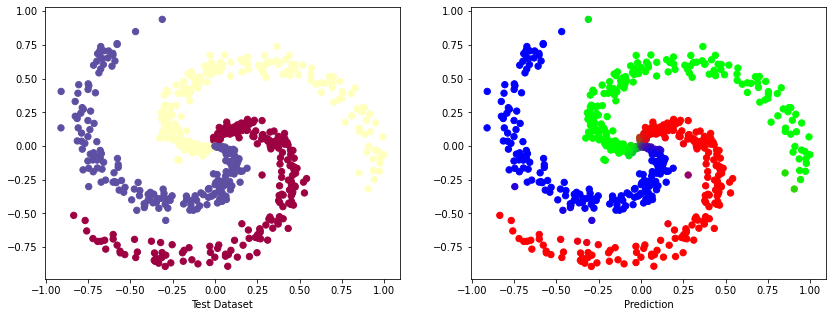

In [8]:
test_output_pred = model.predict(test_x)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Test Dataset")
plt.subplot(1,2,2)
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_output_pred, s=40, cmap=plt.cm.Spectral)
plt.xlabel("Prediction")
plt.show()